 # Etherium Stock Prediction

In [480]:
import tensorflow as tf
from tensorflow import keras


In [481]:
#imports
import pandas_datareader as dr
import matplotlib.pyplot as plt
import pandas
import yfinance as yfin
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler
from sklearn import utils
import math
import numpy as np
import pandas as pd
#yahoo finance - fixes URL exception
yfin.pdr_override()

In [482]:
#collecting the data set
#ETH-USD
#^GSPC
df = pdr.get_data_yahoo("ETH-USD", start="2015-01-01", end="2021-07-26")

#^DJI
#df = pdr.get_data_yahoo("^DJI", start="2018-01-01", end="2019-07-26")
df
slices=80

[*********************100%***********************]  1 of 1 completed


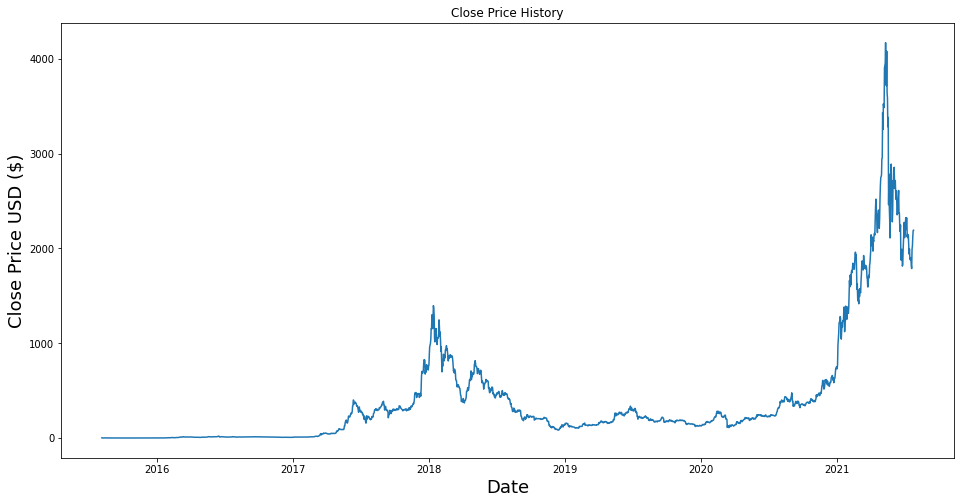

In [483]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

#### Data frame with closed prices

In [484]:
#making data frame with the closed prices 
data = df.filter(['Close'])
print(data)
#Converting the dataframe to a numpy array
dataset = data.values
print(dataset)
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 
print(training_data_len)

                  Close
Date                   
2015-08-07     2.772120
2015-08-08     0.753325
2015-08-09     0.701897
2015-08-10     0.708448
2015-08-11     1.067860
...                 ...
2021-07-21  1990.970825
2021-07-22  2025.202759
2021-07-23  2124.776611
2021-07-24  2189.218750
2021-07-25  2191.373779

[2176 rows x 1 columns]
[[2.77212000e+00]
 [7.53324986e-01]
 [7.01897025e-01]
 ...
 [2.12477661e+03]
 [2.18921875e+03]
 [2.19137378e+03]]
1741


#### scaling the data

In [489]:
#Scale the data

#scale the data between 0 and 1
train_data= dataset[0:training_data_len, :]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data)

#create the training data set , and the scaled training data set
 
#split data into x_train and y_train data sets
x_train = []
y_train = []
#y_train_scaled=[]

#makes slices of all slices:1 possible
for i in range(slices, len(train_data)):
    x_train.append(scaled_data[i-slices:i,0])
    y_train.append(scaled_data[i,0]) 

#### Converting to numpy arrays

In [490]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [491]:
#create the testing data set
test_data = dataset[training_data_len-slices : , :]  #the 20%
#create the data sets x_test and y_test 
scaled_test = scaler.transform(test_data)

x_test = [] 
y_test=[] #actual testing-what we want to predict
for i in range(slices,len(scaled_test)):
    x_test.append(scaled_test[i-slices:i , 0])
    y_test.append(scaled_test[i,0])

#Convert the data to numphy array
x_test = np.array(x_test)
y_test = np.array(y_test)
# get the models predicted price values


# SVR ; rbf

In [498]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#training the data with SVR model 
gamma = np.logspace(-8 , -2, 7) # model complexity the lower , more complex
param_grid = {'C': [1000,10000,100000,1000000],
              'gamma': gamma, }
model1=SVR(kernel='rbf')
model1 = GridSearchCV(model1, param_grid,
                      scoring='neg_root_mean_squared_error',
                      cv=2)
model1.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (model1.best_params_, model1.best_score_))
C= model1.best_params_.get('C')
gamma = model1.best_params_.get('gamma')
print(C)
print(gamma)


The best parameters are {'C': 10000, 'gamma': 1e-05} with a score of -0.06
10000
1e-05


### predict 

In [499]:
import sklearn
predictions1 = model1.predict(x_test)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions1 - y_test)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test,predictions1)
print(sco)
predictions1 = predictions1.reshape(-1, 1)
predictions1 = scaler.inverse_transform(predictions1)

0.16131412380888865
0.94522656851992


### Plotting the prediction

<ipython-input-500-0e4f2addfbe5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions1


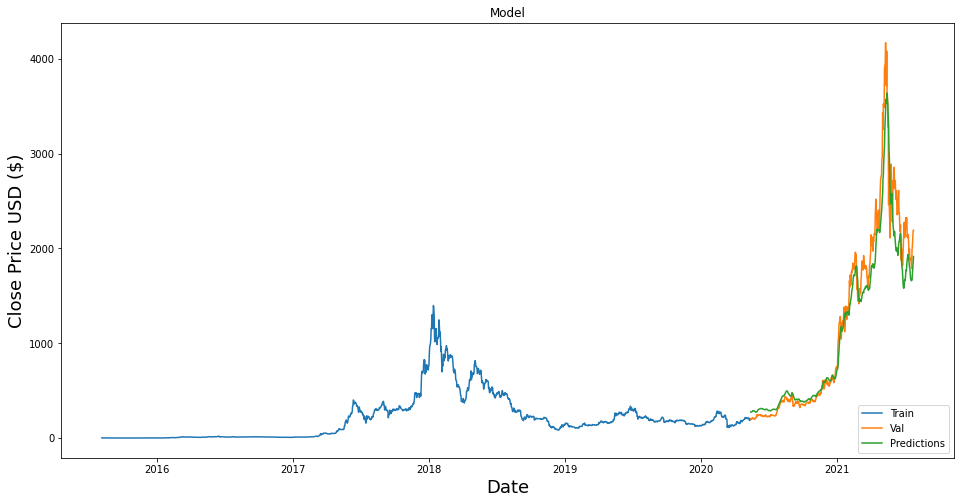

In [500]:
import sklearn

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions1
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Learning Curve - Complexity

In [501]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Gamma 0.2 Accuracy: -0.248818559026027
Gamma 0.01 Accuracy: -0.5736459168597212
Gamma 0.001 Accuracy: 0.5613911428461715
Gamma 0.0001 Accuracy: 0.9393907102869292
Gamma 1e-05 Accuracy: 0.956428911097688
Gamma 5e-06 Accuracy: 0.9585103009310035
Gamma 3.3333333333333337e-06 Accuracy: 0.9558159148439954
Gamma 1e-06 Accuracy: 0.9515183537572579
Gamma 1e-07 Accuracy: 0.9386980329957573
Gamma 1e-08 Accuracy: -14.888287013477555


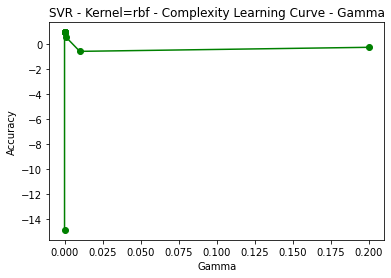

In [502]:
#C=100000
from sklearn import metrics
gammaCheck = [2e-1,1e-2,1e-3,1e-4,1e-5,(1e-5)/2.0,(1e-5)/3.0,1e-6,1e-7,1e-8]
#svrRbfTrain=[]
accuracyResultsTest=[]
C=100000
print("Test accuracy")
for gm in gammaCheck:
    model=SVR(kernel='rbf', C=C, gamma=gm)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Gamma "+ str(gm)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('SVR - Kernel=rbf','Gamma',gammaCheck,accuracyResultsTest,'green')
    


### Learning Curve - samples

# SVR ; polynomial

In [506]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#training the data with SVR model 
C = [10,100,1000] #0.1 , 1 , 10 ... 1e+06
poly = [2,3,4,5,6,7]
co = [10,15,20,50,100,250,500]
param_grid = {'C': [10,100,1000],
              'degree': poly,
               'coef0' : co
             }
model2=SVR(kernel='poly')
model2 = GridSearchCV(model2, param_grid,cv=2)
model2.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (model2.best_params_, model2.best_score_))
C2= model2.best_params_.get('C')
poly = model2.best_params_.get('degree')
coeff = model2.best_params_.get('coef0')
print(C2)
print(poly)
print(coeff)


The best parameters are {'C': 10, 'coef0': 500, 'degree': 2} with a score of 0.82
10
2
500


In [507]:
predictions2 = model2.predict(x_test)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions2 - y_test)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test,predictions2)
print(sco)
predictions2 = predictions2.reshape(-1, 1)
predictions2 = scaler.inverse_transform(predictions2)

0.19530219942635596
0.9197140721194283


### Plotting the prediction

<ipython-input-508-2488ad60692a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions2


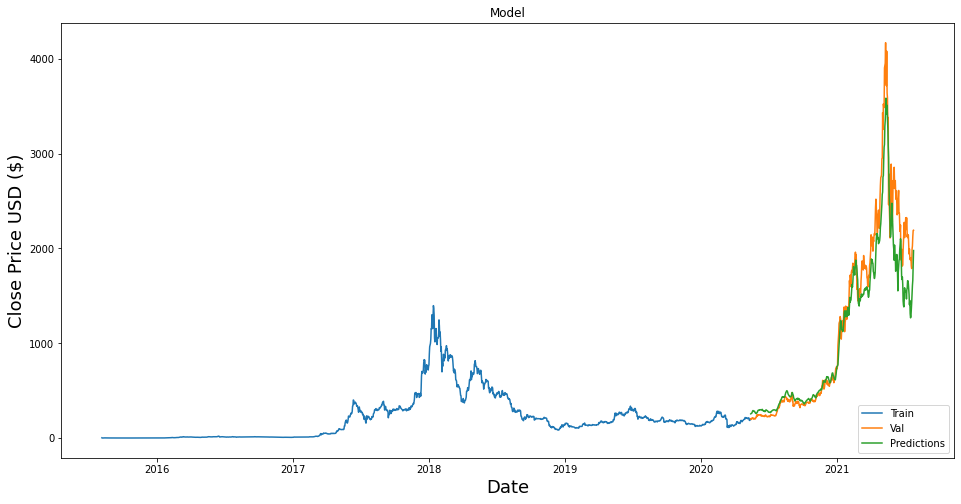

In [508]:
import sklearn

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions2
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

### complexity learning curves

In [509]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Poly 2 Accuracy: 0.9197140721194283
Poly 3 Accuracy: 0.8520677239295643
Poly 4 Accuracy: 0.7559236366185377
Poly 5 Accuracy: 0.6313018219460609
Poly 6 Accuracy: 0.4789896138471176


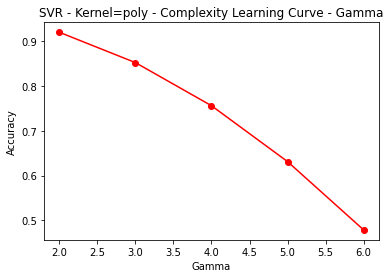

Test accuracy
coef 6 Accuracy: -0.46820756126845886
coef 6 Accuracy: -0.3569314490100477
coef 6 Accuracy: 0.2707703180742157
coef 6 Accuracy: 0.641352534982087
coef 6 Accuracy: 0.8615012017733095
coef 6 Accuracy: 0.9197140721194283


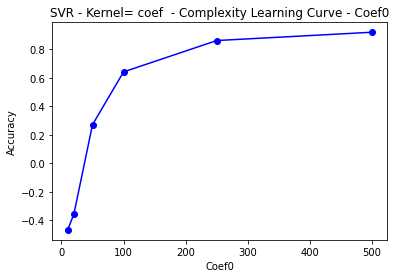

In [511]:
#'coef0': 500 C:10
from sklearn import metrics
poly = [2,3,4,5,6]
accuracyResultsTest=[]
C=10
coef0=500
print("Test accuracy")
for pol in poly:
    model=SVR(kernel='poly', C=C, degree=pol , coef0=coef0)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Poly "+ str(pol)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('SVR - Kernel=poly','Gamma',poly,accuracyResultsTest,'red')

#'poly': 1   .    C:10
from sklearn import metrics
poly = 2
#svrRbfTrain=[]
coef0=[10,20,50,100,250,500]
accuracyResultsTest=[]
C=10
print("Test accuracy")
for co in coef0:
    model=SVR(kernel='poly', C=C, degree=poly , coef0=co)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("coef "+ str(pol)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('SVR - Kernel= coef ','Coef0',coef0,accuracyResultsTest,'blue')


    


### Learning curves

# DTR - Random Forest

In [513]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {'max_depth': range(3,10), # range(3,7)
            'n_estimators': (5,10,50,75, 100), } #3(10, 50, 100, 1000)

model3 = RandomForestRegressor()
model3 = GridSearchCV(model3, param_grid,
                      scoring='neg_root_mean_squared_error',
                     cv=2)
model3.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (model3.best_params_, model3.best_score_))
m= model3.best_params_.get('max_depth')
n = model3.best_params_.get('n_estimators')
print(m)
print(n)


The best parameters are {'max_depth': 6, 'n_estimators': 10} with a score of -0.08
6
10


In [515]:
predictions3 = model3.predict(x_test)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions3 - y_test)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test,predictions3)
print(sco)
predictions3 = predictions3.reshape(-1, 1)
predictions3 = scaler.inverse_transform(predictions3)


0.5855430797444616
0.2783229944023593


### Plotting the prediction

<ipython-input-516-c40454cd5a8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions3


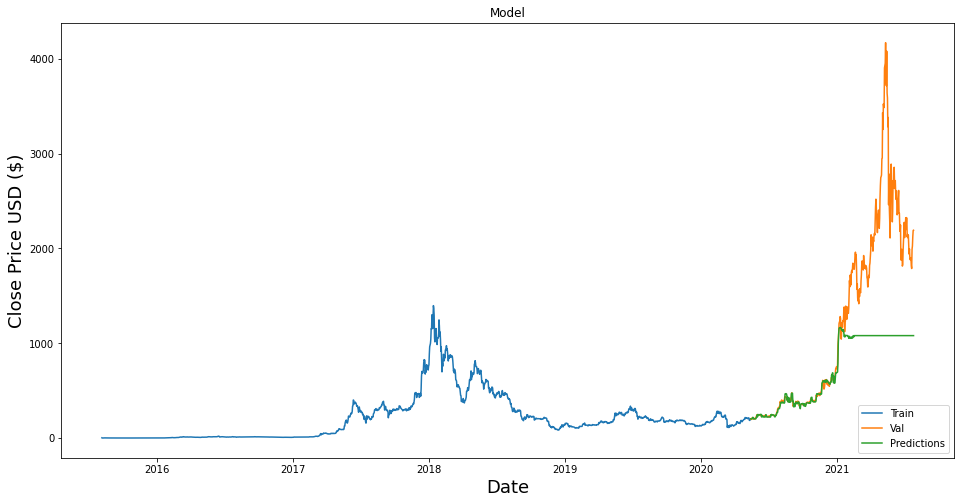

In [516]:
import sklearn

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions3
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Learning curve - complexity

In [517]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Max_Depth 3 Accuracy: 0.3358383922807905
Max_Depth 4 Accuracy: 0.27003272719721605
Max_Depth 5 Accuracy: 0.21932282931131508
Max_Depth 6 Accuracy: 0.2682342132099378
Max_Depth 7 Accuracy: 0.28622102025114526
Max_Depth 8 Accuracy: 0.27807144203770395
Max_Depth 9 Accuracy: 0.2505123484925511
Max_Depth 10 Accuracy: 0.22052367311580723


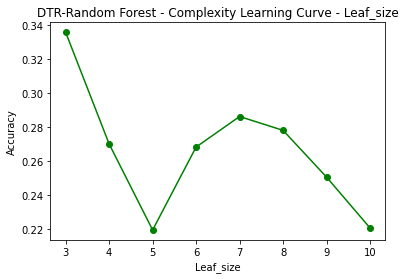

n_estimators 5 Accuracy: 0.24160665159593941
n_estimators 10 Accuracy: 0.2982541233152829
n_estimators 50 Accuracy: 0.23354455740141078
n_estimators 75 Accuracy: 0.26426792096362917
n_estimators 100 Accuracy: 0.2328935303358789


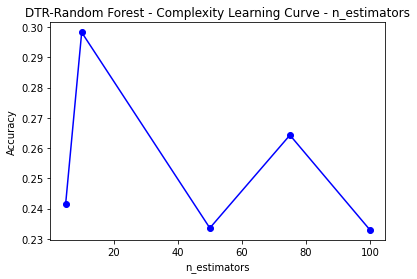

In [518]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
# ------------------- max_depth -------------------#
# n_estimators = 10
n_estimators = 5
max_depth=[3,4,5,6,7,8,9,10]

accuracyResultsTest=[]
print("Test accuracy")
for md in max_depth:
    model=RandomForestRegressor(max_depth=md,n_estimators=n_estimators)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Max_Depth "+ str(md)+" Accuracy:",metrics.r2_score(y_test,predictions))
      
complexity_learning_curve('DTR-Random Forest','Leaf_size',max_depth,accuracyResultsTest,'green')
#------------------- n_estimators ----------------------#
# max_depth = 7
max_depth = 6
n_estimators=[5,10,50,75,100]

accuracyResultsTest=[]

for ne in n_estimators:
    model=RandomForestRegressor(max_depth=m,n_estimators=n)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("n_estimators "+ str(ne)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('DTR-Random Forest','n_estimators',n_estimators,accuracyResultsTest,'blue')

# NN - Nearest Neighbor

In [519]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors': (8,10,12,13,14,15,25,50,100),
               'leaf_size': (1,5,10,15,20,25),
             } 

model4 = KNeighborsRegressor(algorithm='auto')
model4 = GridSearchCV(model4, param_grid ,
    scoring='neg_root_mean_squared_error')
model4.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (model4.best_params_, model4.best_score_))
n_neighbors= model4.best_params_.get('n_neighbors')
leaf_size = model4.best_params_.get('leaf_size')
print(n_neighbors)
print(leaf_size)

model4 = KNeighborsRegressor(algorithm='auto',n_neighbors=5)
model4.fit(x_train, y_train)


The best parameters are {'leaf_size': 1, 'n_neighbors': 25} with a score of -0.07
25
1


KNeighborsRegressor()

### creating the dataset

In [520]:
predictions4 = model4.predict(x_test)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions4 - y_test)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test,predictions4)
print(sco)
predictions4 = predictions4.reshape(-1, 1)
predictions4 = scaler.inverse_transform(predictions4)

0.7011670751387319
-0.034828049251988125


### plotting the prediction

<ipython-input-521-c8a04ec4458a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions4


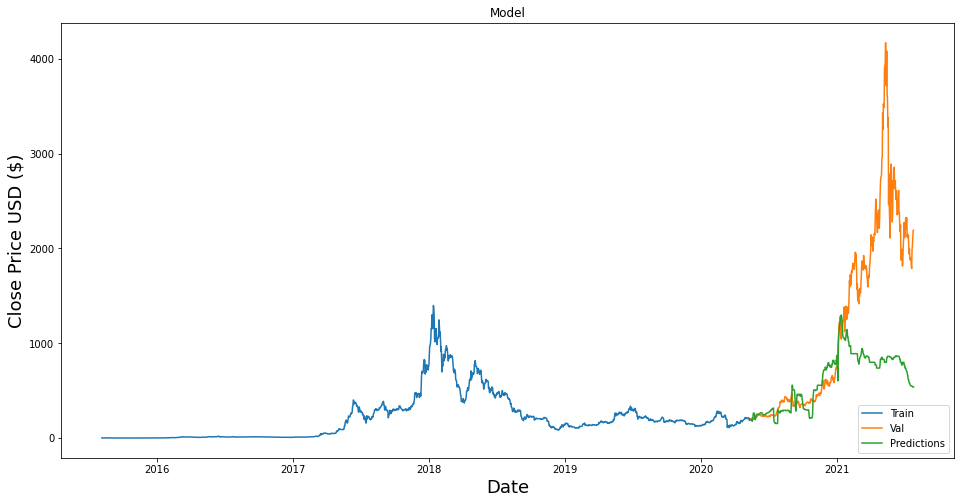

In [521]:
import sklearn
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions4
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Learning curve - complexity 

In [522]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Leaf_size 1 Accuracy: -0.055192258698756325
Leaf_size 5 Accuracy: -0.055192258698756325
Leaf_size 10 Accuracy: -0.055192258698756325
Leaf_size 15 Accuracy: -0.055192258698756325
Leaf_size 20 Accuracy: -0.055192258698756325
Leaf_size 25 Accuracy: -0.055192258698756325


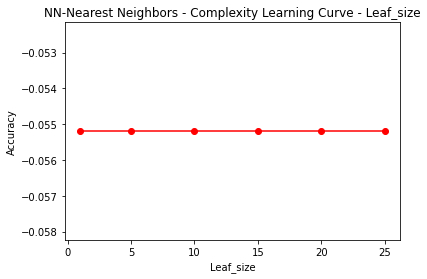

n_neighbors 8 Accuracy: -0.03453318529781302
n_neighbors 10 Accuracy: -0.03678912256163258
n_neighbors 15 Accuracy: -0.04419548334118639
n_neighbors 25 Accuracy: -0.055192258698756325
n_neighbors 50 Accuracy: -0.0792792656598551
n_neighbors 100 Accuracy: -0.1183052096628805


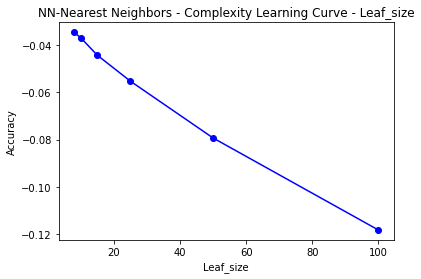

In [523]:
from sklearn.neighbors import KNeighborsRegressor
# ------------------- Leaf_size -------------------#
# n_neighbors = 25
import matplotlib.pyplot as plt
from sklearn import metrics
n_neighbors = 25
leaf_size=[1,5,10,15,20,25]
accuracyResultsTest=[]
print("Test accuracy")
for ls in leaf_size:
    model=KNeighborsRegressor(n_neighbors=n_neighbors,leaf_size=ls,algorithm='auto')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    #treeClasifier.append(metrics.accuracy_score(y_test,y_predict))
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Leaf_size "+ str(ls)+" Accuracy:",metrics.r2_score(y_test,predictions))
      
complexity_learning_curve('NN-Nearest Neighbors','Leaf_size',leaf_size,accuracyResultsTest,'red')
#------------------- n- neighbors ----------------------#
# Leaf_size = 20
Leaf_size = 20
n_neighbors = [8,10,15,25,50,100]
accuracyResultsTest=[]

for nn in n_neighbors:
    model=KNeighborsRegressor(n_neighbors=nn,leaf_size=leaf_size,algorithm='auto')
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    #treeClasifier.append(metrics.accuracy_score(y_test,y_predict))
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("n_neighbors "+ str(nn)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('NN-Nearest Neighbors','Leaf_size',n_neighbors,accuracyResultsTest,'blue')

# kernal ridge regression

In [524]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV

param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7],
              "gamma": np.logspace(-6, 0, 7)}

model5 = KernelRidge(kernel="rbf")
model5 = GridSearchCV(model5, param_grid ,
    scoring='neg_root_mean_squared_error')
model5.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (model5.best_params_, model5.best_score_))
gamma= model5.best_params_.get('gamma')
alpha = model5.best_params_.get('alpha')
print(gamma)
print(alpha)



The best parameters are {'alpha': 1e-07, 'gamma': 1e-05} with a score of -0.01
1e-05
1e-07


### creating the dataset

In [525]:
predictions5 = model5.predict(x_test)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions5 - y_test)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test,predictions5)
print(sco)
predictions5 = predictions5.reshape(-1, 1)
predictions5 = scaler.inverse_transform(predictions5)

0.08525968742963834
0.9846992529721686


### Plotting the prediction

<ipython-input-526-6540835ba173>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions5


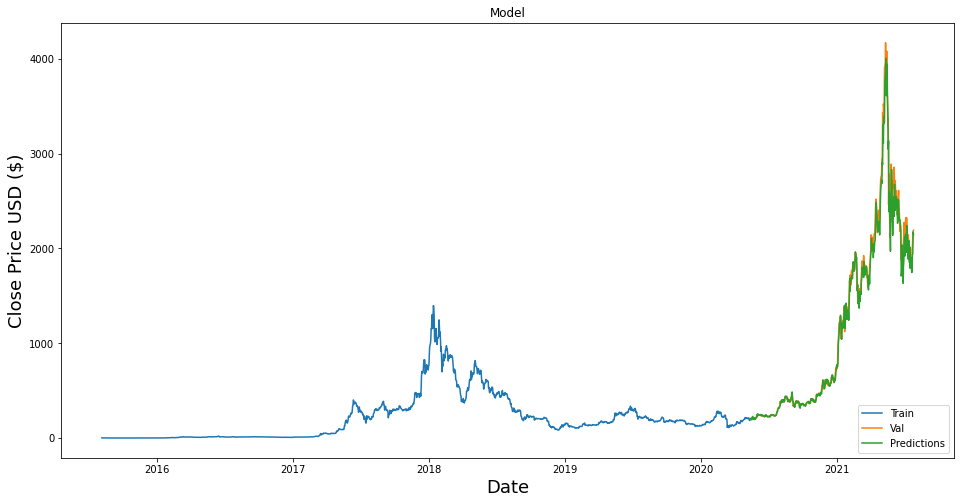

In [526]:
import sklearn
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions5
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# LEARNING CURVE - COMPLEXITY

#### complexity learning curve func

In [527]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Alpha 0.1 Accuracy: 0.757163137402161
Alpha 0.01 Accuracy: 0.9283824138315226
Alpha 0.001 Accuracy: 0.9657037499077139
Alpha 0.0001 Accuracy: 0.9783489446065903
Alpha 1e-05 Accuracy: 0.9816544915823051
Alpha 1e-06 Accuracy: 0.9772158037077268
Alpha 1e-07 Accuracy: 0.9593803676047474
Alpha 1e-08 Accuracy: 0.8838150965313368
Alpha 1e-09 Accuracy: 0.5694569158208372


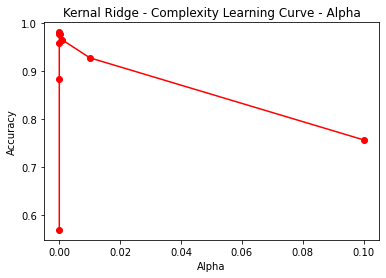

Gamma 0.1 Accuracy: -0.9057124914729584
Gamma 0.01 Accuracy: -1.4272237997522055
Gamma 0.001 Accuracy: 0.8144395743308057
Gamma 0.0001 Accuracy: 0.9816544915823051
Gamma 1e-05 Accuracy: 0.9839552975982662
Gamma 1e-06 Accuracy: 0.969627803957139
Gamma 1e-07 Accuracy: 0.9319665776441503
7
7


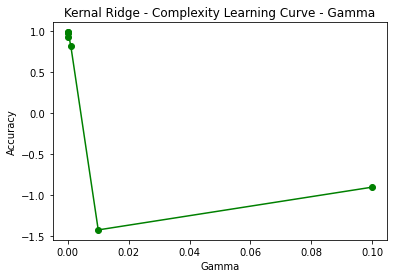

In [528]:
# ------------------- ALPHA -------------------#
# GAMMA = 0.0001
import matplotlib.pyplot as plt
from sklearn import metrics
alpha = [0.1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
gamma = 0.0001
accuracyResultsTest=[]
C=1000000
print("Test accuracy")
for aph in alpha:
    model=KernelRidge(kernel="rbf", alpha=aph, gamma=gamma)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Alpha "+ str(aph)+" Accuracy:",metrics.r2_score(y_test,predictions))
      
complexity_learning_curve('Kernal Ridge','Alpha',alpha,accuracyResultsTest,'red')
#------------------- GAMMA ----------------------#
# alpha = 1e-5
alpha = 1e-5
gamma = [0.1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7]
accuracyResultsTest=[]

for gm in gamma:
    model=KernelRidge(kernel="rbf", alpha=alpha, gamma=gm)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Gamma "+ str(gm)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
print(len(gamma))
print(len(accuracyResultsTest))
complexity_learning_curve('Kernal Ridge','Gamma',gamma,accuracyResultsTest,'green')

# PCA - USAGE 

### PCA Prep with bigger slices

In [529]:
slices_pca=200

#scale the data between 0 and 1
train_data= dataset[0:training_data_len, :]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data)

#create the training data set , and the scaled training data set
 
#split data into x_train and y_train data sets
x_train_pc = []
y_train_pc = []
#y_train_scaled=[]

#makes slices of all 60:1 possible
for i in range(slices_pca, len(train_data)): #from 60 to 1603
    x_train_pc.append(scaled_data[i-slices_pca:i,0])
    y_train_pc.append(scaled_data[i,0])  #y_train.append(dataset[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [530]:
#create the testing data set
test_data = dataset[training_data_len-slices_pca : , :]  #the 20%
#create the data sets x_test and y_test 
scaled_test = scaler.transform(test_data)

x_test_pc = []  
y_test_pc =[] #actual testing-what we want to predict
for i in range(slices_pca,len(scaled_test)):
    x_test_pc.append(scaled_test[i-slices_pca:i , 0])
    y_test_pc.append(scaled_test[i,0])


# SVR - USING PCA

In [531]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

components=20

pca1=PCA(n_components=components).fit(x_train_pc)
x_train_pca1 = pca1.transform(x_train_pc)

#training the data with SVR model 
gamma = np.logspace(-8 , -3, 10) # model complexity the lower , more complex
param_grid = {'C': [100,1000,10000,100000,1000000],
              'gamma': gamma, }
model1_pca=SVR(kernel='rbf')
model1_pca = GridSearchCV(model1_pca, param_grid ,
    scoring='neg_root_mean_squared_error',
                         cv=10)

model1_pca.fit(x_train_pca1, y_train_pc)

print("The best parameters are %s with a score of %0.2f"
      % (model1_pca.best_params_, model1_pca.best_score_))
C= model1_pca.best_params_.get('C')
gamma = model1_pca.best_params_.get('gamma')
print(C)
print(gamma)

The best parameters are {'C': 1000, 'gamma': 0.0002782559402207126} with a score of -0.06
1000
0.0002782559402207126


### Creating the Testing Data Set

In [535]:
#Convert the data to numphy array
x_test_pca1 = pca1.transform(x_test_pc)

In [536]:
# get the models predicted price values
predictions_pca_1 = model1_pca.predict(x_test_pca1)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions_pca_1 - y_test_pc)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test_pc,predictions_pca_1)
print(sco)
predictions_pca_1 = predictions_pca_1.reshape(-1, 1)
predictions_pca_1 = scaler.inverse_transform(predictions_pca_1)

0.3298676278391393
0.7709635744327672


### Plotting the prediction

<ipython-input-537-e66e918dc3fc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_pca_1


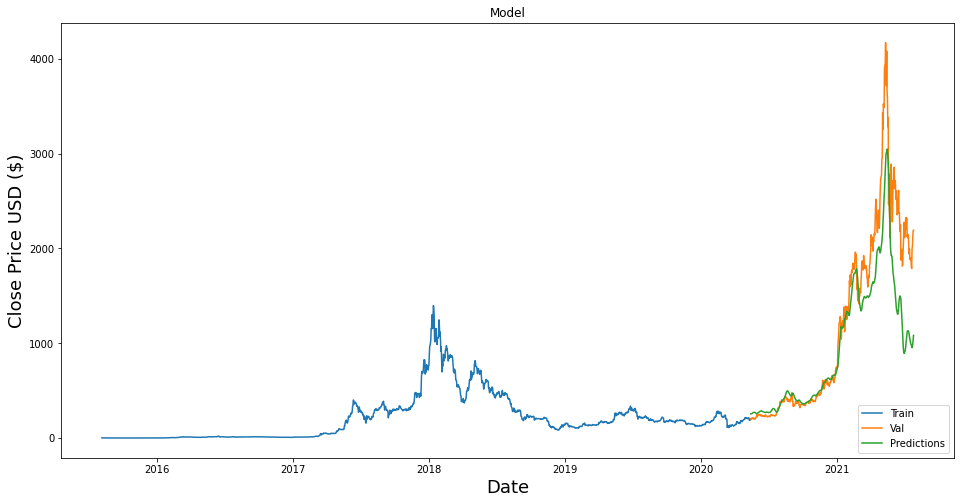

In [537]:
import sklearn

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions_pca_1
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Learning curve - complexity

In [538]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Gamma 0.2 Accuracy: -0.248818559026027
Gamma 0.01 Accuracy: -0.5736459168597212
Gamma 0.001 Accuracy: 0.5613911428461715
Gamma 0.0001 Accuracy: 0.9393907102869292
Gamma 1e-05 Accuracy: 0.956428911097688
Gamma 5e-06 Accuracy: 0.9585103009310035
Gamma 3.3333333333333337e-06 Accuracy: 0.9558159148439954
Gamma 1e-06 Accuracy: 0.9515183537572579
Gamma 1e-07 Accuracy: 0.9386980329957573
Gamma 1e-08 Accuracy: -14.888287013477555


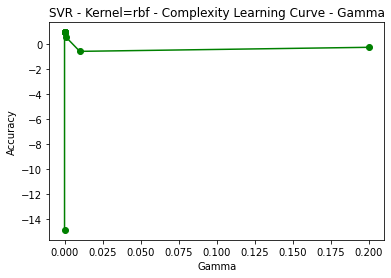

In [539]:
#C=100000
from sklearn import metrics
gammaCheck = [2e-1,1e-2,1e-3,1e-4,1e-5,(1e-5)/2.0,(1e-5)/3.0,1e-6,1e-7,1e-8]
#svrRbfTrain=[]
accuracyResultsTest=[]
C=100000
print("Test accuracy")
for gm in gammaCheck:
    model=SVR(kernel='rbf', C=C, gamma=gm)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    #treeClasifier.append(metrics.accuracy_score(y_test,y_predict))
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Gamma "+ str(gm)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('SVR - Kernel=rbf','Gamma',gammaCheck,accuracyResultsTest,'green')
    


# Kernal ridge regression - using PCA

### Kernal ridge slices

In [540]:
slices_pca=150

#scale the data between 0 and 1
train_data= dataset[0:training_data_len, :]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(train_data)

#create the training data set , and the scaled training data set
 
#split data into x_train and y_train data sets
x_train_pc = []
y_train_pc = []
#y_train_scaled=[]

#makes slices of all slices:1 possible
for i in range(slices_pca, len(train_data)):
    x_train_pc.append(scaled_data[i-slices_pca:i,0])
    y_train_pc.append(scaled_data[i,0])  

x_train, y_train = np.array(x_train), np.array(y_train)




In [541]:
#create the testing data set
test_data = dataset[training_data_len-slices_pca : , :]  #the 20%
#create the data sets x_test and y_test 
scaled_test = scaler.transform(test_data)

x_test_pc = []  
y_test_pc =[]#actual testing-what we want to predict
for i in range(slices_pca,len(scaled_test)):
    x_test_pc.append(scaled_test[i-slices_pca:i , 0])
    y_test_pc.append(scaled_test[i,0])


## Kernal ridge with PCA

In [542]:
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

components=0.99
pca2=PCA(n_components=components).fit(x_train_pc)
x_train_pca2 = pca2.transform(x_train_pc)

#training the data with ridge model 
param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7],
              "gamma": np.logspace(-6, 0, 7)}

model2_pca = KernelRidge(kernel="rbf")
model2_pca = GridSearchCV(model2_pca, param_grid ,
    scoring='neg_root_mean_squared_error',
                         cv=2)
model2_pca.fit(x_train_pca2, y_train_pc)

print("The best parameters are %s with a score of %0.2f"
      % (model2_pca.best_params_, model2_pca.best_score_))
gamma= model2_pca.best_params_.get('gamma')
alpha = model2_pca.best_params_.get('alpha')
print(gamma)
print(alpha)

The best parameters are {'alpha': 1e-07, 'gamma': 1e-06} with a score of -0.04
1e-06
1e-07


### Creating the testing data set

In [543]:
x_test_pca2 = pca2.transform(x_test_pc)

In [544]:
# get the models predicted price values
predictions_pca_2 = model2_pca.predict(x_test_pca2)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions_pca_2 - y_test_pc)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test_pc,predictions_pca_2)
print(sco)
predictions_pca_2 = predictions_pca_2.reshape(-1, 1)
predictions_pca_2 = scaler.inverse_transform(predictions_pca_2)

0.1491050540355773
0.9532038750931349


### Plotting the prediction

<ipython-input-545-aa4ab042f7d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_pca_2


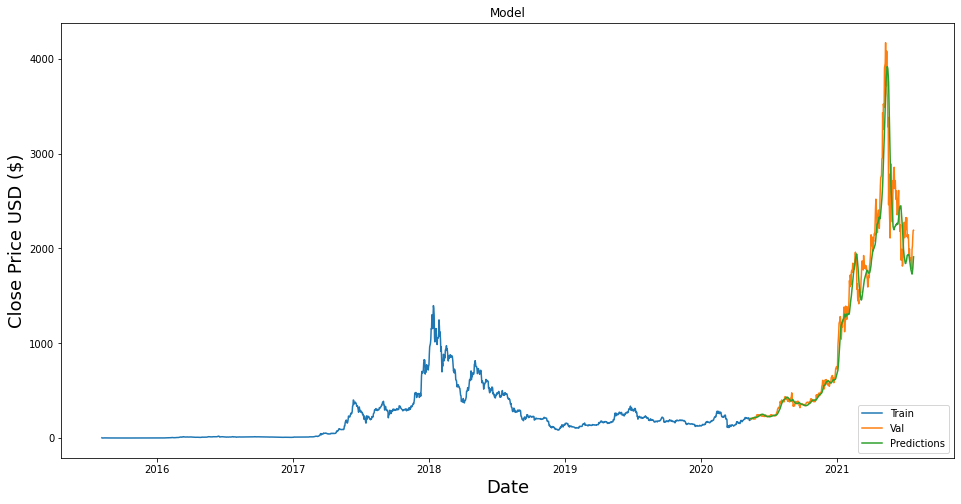

In [545]:
import sklearn

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions_pca_2
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Learning curve - complexity

In [546]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Alpha 0.1 Accuracy: 0.757163137402161
Alpha 0.01 Accuracy: 0.9283824138315226
Alpha 0.001 Accuracy: 0.9657037499077139
Alpha 0.0001 Accuracy: 0.9783489446065903
Alpha 1e-05 Accuracy: 0.9816544915823051
Alpha 1e-06 Accuracy: 0.9772158037077268
Alpha 1e-07 Accuracy: 0.9593803676047474
Alpha 1e-08 Accuracy: 0.8838150965313368
Alpha 1e-09 Accuracy: 0.5694569158208372


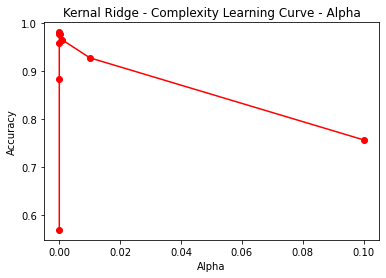

Gamma 0.1 Accuracy: -0.9057124914729584
Gamma 0.01 Accuracy: -1.4272237997522055
Gamma 0.001 Accuracy: 0.8144395743308057
Gamma 0.0001 Accuracy: 0.9816544915823051
Gamma 1e-05 Accuracy: 0.9839552975982662
Gamma 1e-06 Accuracy: 0.969627803957139
Gamma 1e-07 Accuracy: 0.9319665776441503
7
7


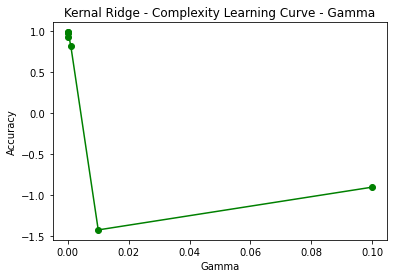

In [547]:
# ------------------- ALPHA -------------------#
# GAMMA = 0.0001
import matplotlib.pyplot as plt
from sklearn import metrics
alpha = [0.1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9]
gamma = 0.0001
accuracyResultsTest=[]
C=1000000
print("Test accuracy")
for aph in alpha:
    model=KernelRidge(kernel="rbf", alpha=aph, gamma=gamma)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Alpha "+ str(aph)+" Accuracy:",metrics.r2_score(y_test,predictions))
      
complexity_learning_curve('Kernal Ridge','Alpha',alpha,accuracyResultsTest,'red')
#------------------- GAMMA ----------------------#
# alpha = 1e-5
alpha = 1e-5
gamma = [0.1, 1e-2, 1e-3,1e-4,1e-5,1e-6,1e-7]
accuracyResultsTest=[]

for gm in gamma:
    model=KernelRidge(kernel="rbf", alpha=alpha, gamma=gm)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Gamma "+ str(gm)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
print(len(gamma))
print(len(accuracyResultsTest))
complexity_learning_curve('Kernal Ridge','Gamma',gamma,accuracyResultsTest,'green')

# Random Forest - Using PCA

In [552]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

components=0.99
#components=20
#components=100
#components=150

pca3=PCA(n_components=components).fit(x_train_pc)
x_train_pca3 = pca3.transform(x_train_pc)

param_grid = {'max_depth': range(7,13), # range(3,7)
            'n_estimators': (10,25,50, 100), } #3(10, 50, 100, 1000)
model3_pca = RandomForestRegressor()
model3_pca = GridSearchCV(model3_pca, param_grid ,
    scoring='neg_root_mean_squared_error')
model3_pca.fit(x_train_pca3, y_train_pc)

print("The best parameters are %s with a score of %0.2f"
      % (model3_pca.best_params_, model3_pca.best_score_))
m_pc= model3_pca.best_params_.get('max_depth')
n_pc = model3_pca.best_params_.get('n_estimators')
print(m_pc)
print(n_pc)




The best parameters are {'max_depth': 10, 'n_estimators': 100} with a score of -0.11
10
100


### Creating the testing data set

In [553]:
x_test_pca3 = pca3.transform(x_test_pc)

In [554]:
# get the models predicted price values
predictions_pca_3 = model3_pca.predict(x_test_pca3)
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions_pca_3 - y_test_pc)**2))
print(rmse)
sco = sklearn.metrics.r2_score(y_test_pc,predictions_pca_3)
print(sco)
predictions_pca_3 = predictions_pca_3.reshape(-1, 1)
predictions_pca_3 = scaler.inverse_transform(predictions_pca_3)

0.7002974581274432
-0.03226276614682999


### Plotting the prediction

<ipython-input-555-2e3935dc965a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_pca_3


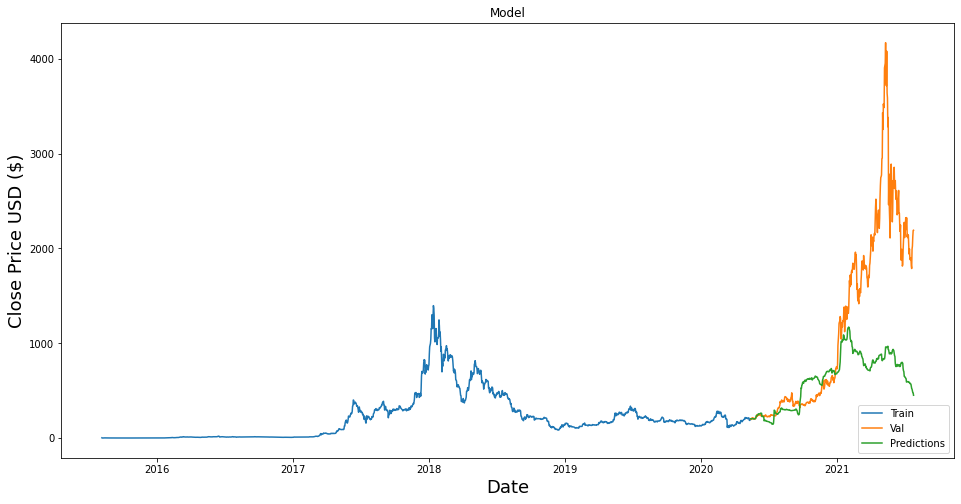

In [555]:
import sklearn
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions_pca_3
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Learning curve - complexity

In [557]:
def complexity_learning_curve(model_name,component,component_list,accuracyResults,color):
    plt.xlabel(component)
    plt.ylabel('Accuracy')
    plt.title(model_name + ' - Complexity Learning Curve '+ '- '+component)
    plt.plot(component_list,accuracyResultsTest,color=color,marker='o')
    plt.show()

Test accuracy
Max_Depth 3 Accuracy: 0.3082207081673468
Max_Depth 4 Accuracy: 0.2526655615664821
Max_Depth 5 Accuracy: 0.2400972679578428
Max_Depth 6 Accuracy: 0.28813725999582973
Max_Depth 7 Accuracy: 0.3019149832743664
Max_Depth 8 Accuracy: 0.292182370338122
Max_Depth 9 Accuracy: 0.3203233594204301
Max_Depth 10 Accuracy: 0.3051233293823695


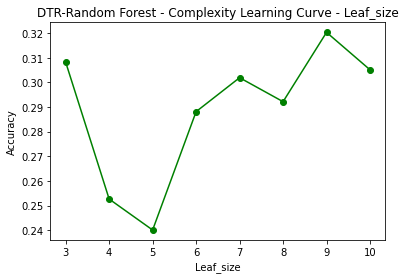

n_estimators 5 Accuracy: 0.2868425503996076
n_estimators 10 Accuracy: 0.24003989812434678
n_estimators 50 Accuracy: 0.2805214475211636
n_estimators 75 Accuracy: 0.2541089674193523
n_estimators 100 Accuracy: 0.24587047809903184


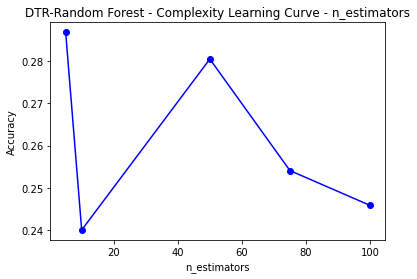

In [558]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
# ------------------- max_depth -------------------#
# n_estimators = 10
n_estimators = 5
max_depth=[3,4,5,6,7,8,9,10]

accuracyResultsTest=[]
print("Test accuracy")
for md in max_depth:
    model=RandomForestRegressor(max_depth=md,n_estimators=n_estimators)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("Max_Depth "+ str(md)+" Accuracy:",metrics.r2_score(y_test,predictions))
      
complexity_learning_curve('DTR-Random Forest','Leaf_size',max_depth,accuracyResultsTest,'green')
#------------------- n_estimators ----------------------#
# max_depth = 7
max_depth = 6
n_estimators=[5,10,50,75,100]

accuracyResultsTest=[]

for ne in n_estimators:
    model=RandomForestRegressor(max_depth=m,n_estimators=n)
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracyResultsTest.append(metrics.r2_score(y_test,predictions))
    print("n_estimators "+ str(ne)+" Accuracy:",metrics.r2_score(y_test,predictions))
    
complexity_learning_curve('DTR-Random Forest','n_estimators',n_estimators,accuracyResultsTest,'blue')

# NN

In [390]:
print(x_train.shape)

input_shape=(x_train.shape[0],slices,1)
print(input_shape)
x_train_nn = x_train.reshape(input_shape)
x_train_nn.shape

(1661, 80)
(1661, 80, 1)


(1661, 80, 1)

# CNN (1262, 60)

In [391]:
'''conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=3,
                           activation='relu',input_shape=(x_train_nn.shape[1],x_train_nn.shape[2])),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation="linear"),
])'''

import tensorflow as tf
from tensorflow import keras
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=7,
                           activation='relu',input_shape=(x_train_nn.shape[1],x_train_nn.shape[2])),
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=7,
                           activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1,activation="linear"),
])


lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=30000,
    decay_rate=0.1)
#optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
#optimizer_cnn = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer_cnn = tf.keras.optimizers.Adam()

batch_size = 12
epochs = 170
conv_model.compile(
    loss="mse", 
    optimizer = optimizer_cnn,
    metrics=["mae","accuracy"],
)
#final = model.fit(x_train_cnn, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
final_cnn = conv_model.fit(x_train_nn, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)
#conv_model.save('my.model')
conv_model.save('myCNN.model')


Epoch 1/170
111/111 [==============================] - 1s 3ms/step - loss: 0.0061 - mae: 0.0410 - accuracy: 7.5301e-04 - val_loss: 8.5116e-04 - val_mae: 0.0250 - val_accuracy: 0.0000e+00
Epoch 2/170
111/111 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0255 - accuracy: 7.5301e-04 - val_loss: 0.0015 - val_mae: 0.0352 - val_accuracy: 0.0000e+00
Epoch 3/170
111/111 [==============================] - 0s 3ms/step - loss: 0.0023 - mae: 0.0264 - accuracy: 7.5301e-04 - val_loss: 0.0011 - val_mae: 0.0294 - val_accuracy: 0.0000e+00
Epoch 4/170
111/111 [==============================] - 0s 2ms/step - loss: 0.0017 - mae: 0.0234 - accuracy: 7.5301e-04 - val_loss: 3.7683e-04 - val_mae: 0.0165 - val_accuracy: 0.0000e+00
Epoch 5/170
111/111 [==============================] - 0s 3ms/step - loss: 0.0010 - mae: 0.0171 - accuracy: 7.5301e-04 - val_loss: 7.4242e-04 - val_mae: 0.0229 - val_accuracy: 0.0000e+00
Epoch 6/170
111/111 [==============================] - 0s 3ms/step - loss

KeyboardInterrupt: 

(435, 80)
loss: 0.013417600654065609
accuracy: 0.06907719373703003


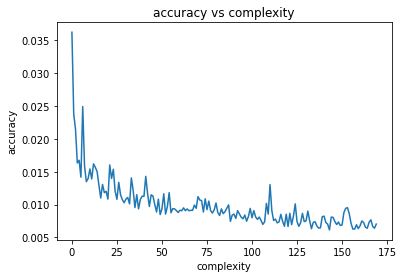

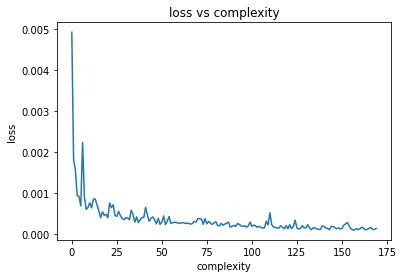

0.9717577009008337


In [215]:
print(x_test.shape)
x_test_cnn= x_test.reshape((x_test.shape[0],slices,1))

def plot(e,h):
    i=0
    temp = np.zeros([ e ])
    while(i< e ):
        temp[i]=i
        i = i+1
    plt.plot(temp,h.history['mae'])
    plt.xlabel('complexity')
    plt.ylabel('accuracy')
    plt.title('accuracy vs complexity')
    plt.show()
    plt.plot(temp,h.history['loss'])
    plt.xlabel('complexity')
    plt.ylabel('loss')
    plt.title('loss vs complexity')
    plt.show()

score = conv_model.evaluate(x_test_cnn, y_test, verbose=0)
print("loss:", score[0])
print("accuracy:", score[1])
plot(epochs,final_cnn)
cnn_predictions = conv_model.predict(x_test_cnn)
sco = sklearn.metrics.r2_score(y_test,cnn_predictions)
print(sco)

In [211]:
cnn_predictions = scaler.inverse_transform(cnn_predictions)

<ipython-input-212-5aed7b82581f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = cnn_predictions


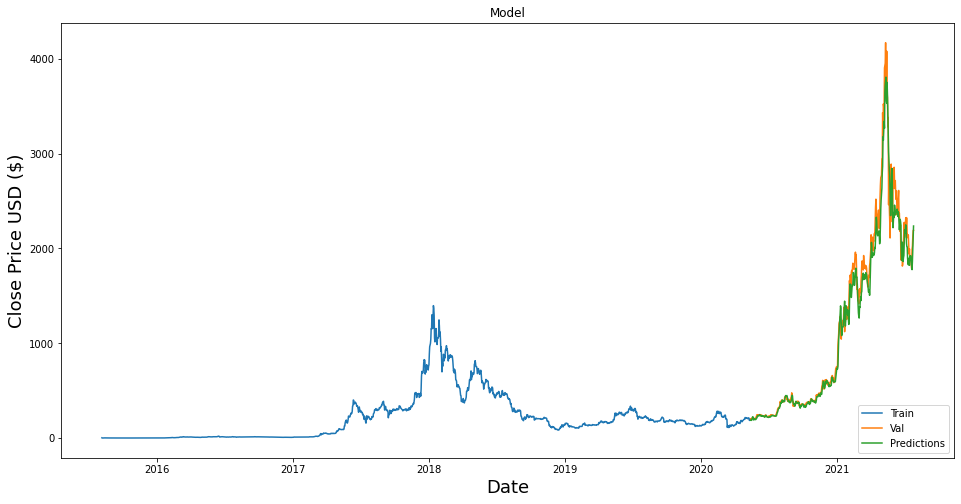

In [212]:
import sklearn
from sklearn import metrics 

#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = cnn_predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# RNN

In [392]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow import keras
"""
rnn_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50,return_sequences=True, activation='tanh',input_shape=(x_train_rnn.shape[1],x_train_rnn.shape[2])),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50,return_sequences=True, activation='tanh',input_shape=(x_train_rnn.shape[1],x_train_rnn.shape[2])),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(50,return_sequences=True, activation='tanh',input_shape=(x_train_rnn.shape[1],x_train_rnn.shape[2])),
    tf.keras.layers.LSTM(50, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1),
])
"""
rnn_model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=150, return_sequences=True, input_shape=(x_train_nn.shape[1],1), activation='tanh'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=150, return_sequences=True, input_shape=(x_train_nn.shape[1],1), activation='tanh'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=150, return_sequences=True, input_shape=(x_train_nn.shape[1],1), activation='tanh'),
    #tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GRU(units=150, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1),
])


lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.9)
#ptimizer = keras.optimizers.Adam(learning_rate=0.01)
#optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#optimizer = tf.keras.optimizers.RMSprop()
optimizer_rnn = tf.keras.optimizers.Adam()

#optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False)
batch_size = 20
epochs = 50
rnn_model.compile(
    loss="mse", 
    optimizer = optimizer_rnn,
    metrics=["mae"],
)
#final = rnn_model.fit(x_train_rnn,y_train,epochs=epochs,batch_size=24,verbose=1, validation_split=0.2)

In [393]:
final_rnn = rnn_model.fit(x_train_nn,y_train,epochs=epochs,batch_size=batch_size,verbose=1, validation_split=0.2)

Epoch 1/50
67/67 [==============================] - 15s 143ms/step - loss: 0.0050 - mae: 0.0427 - val_loss: 3.1370e-04 - val_mae: 0.0147
Epoch 2/50
67/67 [==============================] - 9s 132ms/step - loss: 0.0023 - mae: 0.0295 - val_loss: 1.9169e-04 - val_mae: 0.0100
Epoch 3/50
67/67 [==============================] - 9s 136ms/step - loss: 0.0026 - mae: 0.0322 - val_loss: 1.6452e-04 - val_mae: 0.0099
Epoch 4/50
67/67 [==============================] - 9s 138ms/step - loss: 0.0017 - mae: 0.0262 - val_loss: 3.7373e-04 - val_mae: 0.0167
Epoch 5/50
67/67 [==============================] - 9s 128ms/step - loss: 0.0018 - mae: 0.0291 - val_loss: 1.3414e-04 - val_mae: 0.0082
Epoch 6/50
67/67 [==============================] - 9s 132ms/step - loss: 0.0016 - mae: 0.0248 - val_loss: 2.8751e-04 - val_mae: 0.0153
Epoch 7/50
67/67 [==============================] - 9s 130ms/step - loss: 0.0013 - mae: 0.0230 - val_loss: 3.1146e-04 - val_mae: 0.0158
Epoch 8/50
67/67 [=============================

In [394]:
rnn_model.save('myRNN.model')


INFO:tensorflow:Assets written to: myRNN.model\assets


INFO:tensorflow:Assets written to: myRNN.model\assets


(435, 80)
loss: 0.017298290506005287
accuracy: 0.05912092328071594


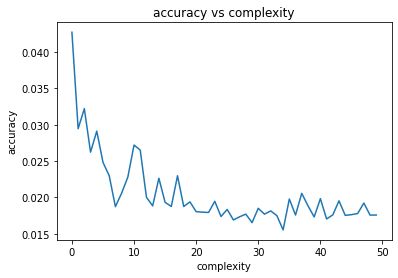

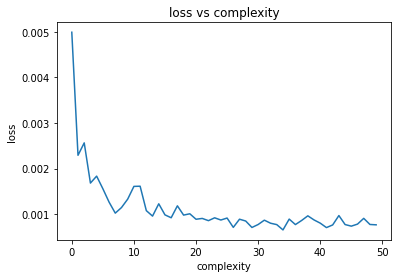

In [395]:
print(x_test.shape)
x_test_rnn= x_test.reshape((x_test.shape[0],slices,1))

def plot(e,h):
    i=0
    temp = np.zeros([ e ])
    while(i< e ):
        temp[i]=i
        i = i+1
    plt.plot(temp,h.history['mae'])
    plt.xlabel('complexity')
    plt.ylabel('accuracy')
    plt.title('accuracy vs complexity')
    plt.show()
    plt.plot(temp,h.history['loss'])
    plt.xlabel('complexity')
    plt.ylabel('loss')
    plt.title('loss vs complexity')
    plt.show()

score = rnn_model.evaluate(x_test_rnn, y_test, verbose=0)
print("loss:", score[0])
print("accuracy:", score[1])
plot(epochs,final_rnn)
predictions_rnn = rnn_model.predict(x_test_rnn)

In [396]:

predictions_rnn = scaler.inverse_transform(predictions_rnn)


<ipython-input-397-497934885f8f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions_rnn


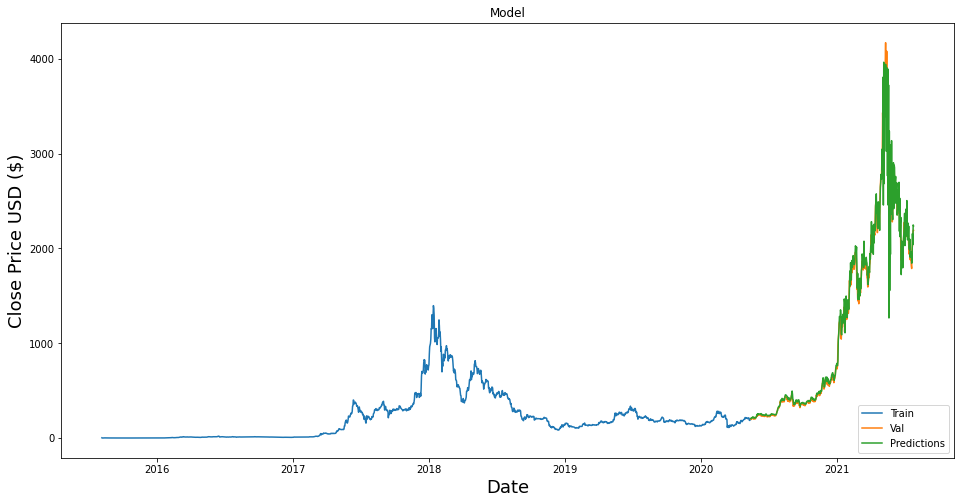

In [397]:
import sklearn
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions_rnn
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()